In [ ]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
print(os.path.exists("/content/drive/MyDrive/SS/laptop_price.csv"))

True


In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/SS/laptop_price.csv", encoding='cp1251')

In [ ]:
# Перейменувати колонку Ram на Ram(GB)
ds = ds.rename(columns={'Ram': 'Ram(GB)'})

# Замінити значення в колонці Ram(GB) на числове значення без тексту "GB"
ds['Ram(GB)'] = ds['Ram(GB)'].str.replace('GB', '').astype(int)

# Перейменувати колонку Weight на Weight(kg)
ds = ds.rename(columns={'Weight': 'Weight(kg)'})

# Замінити значення в колонці Weight(kg) на числове значення без тексту "kg"
ds['Weight(kg)'] = ds['Weight(kg)'].str.replace('kg', '').astype(float)

In [ ]:
ds = ds.drop(['laptop_ID', 'Product'], axis = 1)
ds.nunique()

Company              19
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram(GB)               9
Memory               39
Gpu                 110
OpSys                 9
Weight(kg)          171
Price_euros         791
dtype: int64

In [ ]:
# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# we create and train the encoder

encoder = OneHotEncoder(categories='auto',
                       drop='first', # to return k-1, use drop=false to return k dummies
                       handle_unknown='error') # helps deal with rare labels

one_hot_cols = ['Company','TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

encoder.fit(ds[one_hot_cols])

OneHotEncoder(drop='first')

In [ ]:
# transform the train set

tmp = encoder.transform(ds[one_hot_cols])
ohe_output = pd.DataFrame(tmp.toarray())
ohe_output

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0

In [ ]:
encoder.get_feature_names_out(one_hot_cols)

array(['Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
       'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'Company_Vero',
       'Company_Xiaomi', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'ScreenResolution_1440x900', 'ScreenResolution_1600x900',
       'ScreenResolution_1920x1080', 'ScreenResolution_2560x1440',
       'ScreenResolution_4K Ultra HD / Touchscreen 3840x2160',
       'ScreenResolution_4K Ultra HD 3840x2160',
       'ScreenResolution_Full HD / Touchscreen 1920x1080',
       'ScreenResolution_Full HD 1920x1080',
       'ScreenResolution_IPS Panel 1366x768',
       'ScreenResolution_IPS Panel 2560x1440',
       'ScreenResolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'ScreenResol

In [ ]:
ohe_output.columns = encoder.get_feature_names_out(one_hot_cols)
ohe_output

,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenResolution_1440x900,ScreenResolution_1600x900,ScreenResolution_1920x1080,ScreenResolution_2560x1440,ScreenResolution_4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_4K Ultra HD 3840x2160,ScreenResolution_Full HD / Touchscreen 1920x1080,ScreenResolution_Full HD 1920x1080,ScreenResolution_IPS Panel 1366x768,ScreenResolution_IPS Panel 2560x1440,ScreenResolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_IPS Panel 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Full HD / Touchscreen 1920x1080,ScreenResolution_IPS Panel Full HD 1366x768,ScreenResolution_IPS Panel Full HD 1920x1080,ScreenResolution_IPS Panel Full HD 1920x1200,ScreenResolution_IPS Panel Full HD 2160x1440,ScreenResolution_IPS Panel Full HD 2560x1440,ScreenResolution_IPS Panel Quad HD+ / Touchscreen 3200x1800,ScreenResolution_IPS Panel Quad HD+ 2560x1440,ScreenResolution_IPS Panel Quad HD+ 3200x1800,ScreenResolution_IPS Panel Retina Display 2304x1440,ScreenResolution_IPS Panel Retina Display 2560x1600,ScreenResolution_IPS Panel Retina Display 2736x1824,ScreenResolution_IPS Panel Retina Display 2880x1800,ScreenResolution_IPS Panel Touchscreen / 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Touchscreen 1366x768,ScreenResolution_IPS Panel Touchscreen 1920x1200,ScreenResolution_IPS Panel Touchscreen 2400x1600,ScreenResolution_IPS Panel Touchscreen 2560x1440,ScreenResolution_Quad HD+ / Touchscreen 3200x1800,ScreenResolution_Quad HD+ 3200x1800,ScreenResolution_Touchscreen / 4K Ultra HD 3840x2160,ScreenResolution_Touchscreen / Full HD 1920x1080,ScreenResolution_Touchscreen / Quad HD+ 3200x1800,ScreenResolution_Touchscreen 1366x768,ScreenResolution_Touchscreen 2256x1504,ScreenResolution_Touchscreen 2400x1600,ScreenResolution_Touchscreen 2560x1440,Cpu_AMD A10-Series 9620P 2.5GHz,Cpu_AMD A10-Series A10-9620P 2.5GHz,Cpu_AMD A12-Series 9700P 2.5GHz,Cpu_AMD A12-Series 9720P 2.7GHz,Cpu_AMD A12-Series 9720P 3.6GHz,Cpu_AMD A4-Series 7210 2.2GHz,Cpu_AMD A6-Series 7310 2GHz,Cpu_AMD A6-Series 9220 2.5GHz,Cpu_AMD A6-Series 9220 2.9GHz,Cpu_AMD A6-Series A6-9220 2.5GHz,Cpu_AMD A8-Series 7410 2.2GHz,Cpu_AMD A9-Series 9410 2.9GHz,Cpu_AMD A9-Series 9420 2.9GHz,Cpu_AMD A9-Series 9420 3GHz,Cpu_AMD A9-Series A9-9420 3GHz,Cpu_AMD E-Series 6110 1.5GHz,Cpu_AMD E-Series 7110 1.8GHz,Cpu_AMD E-Series 9000 2.2GHz,Cpu_AMD E-Series 9000e 1.5GHz,Cpu_AMD E-Series E2-6110 1.5GHz,Cpu_AMD E-Series E2-9000 2.2GHz,Cpu_AMD E-Series E2-9000e 1.5GHz,Cpu_AMD FX 8800P 2.1GHz,Cpu_AMD FX 9830P 3GHz,Cpu_AMD Ryzen 1600 3.2GHz,Cpu_AMD Ryzen 1700 3GHz,Cpu_Intel Atom X5-Z8350 1.44GHz,Cpu_Intel Atom Z8350 1.92GHz,Cpu_Intel Atom x5-Z8300 1.44GHz,Cpu_Intel Atom x5-Z8350 1.44GHz,Cpu_Intel Atom x5-Z8550 1.44GHz,Cpu_Intel Celeron Dual Core 3205U 1.5GHz,Cpu_Intel Celeron Dual Core 3855U 1.6GHz,Cpu_Intel Celeron Dual Core N3050 1.6GHz,Cpu_Intel Celeron Dual Core N3060 1.60GHz,Cpu_Intel Celeron Dual Core N3060 1.6GHz,Cpu_Intel Celeron Dual Core N3350 1.1GHz,Cpu_Intel Celeron Dual Core N3350 2.0GHz,Cpu_Intel Celeron Dual Core N3350 2GHz,Cpu_Intel Celeron Quad Core N3160 1.6GHz,Cpu_Intel Celeron Quad Core N3450 1.1GHz,Cpu_Intel Celeron Quad Core N3710 1.6GHz,Cpu_Intel Core M 1.1GHz,Cpu_Intel Core M 1.2GHz,Cpu_Intel Core M 6Y30 0.9GHz,Cpu_Intel Core M 6Y54 1.1GHz,Cpu_Intel Core M 6Y75 1.2GHz,Cpu_Intel Core M 7Y30 1.0GHz,Cpu_Intel Core M M3-6Y30 0.9GHz,Cpu_Intel Core M M7-6Y75 1.2GHz,Cpu_Intel Core M m3 1.2GHz,Cpu_Intel Core M m3-7Y30 2.2GHz,Cpu_Intel Core M m7-6Y75 1.2GHz,Cpu_Intel Core i3 6006U 2.0GHz,Cpu_Intel Core i3 6006U 2.2GHz,Cpu_Intel Core i3 6006U 2GHz,Cpu_Intel Core i3 6100U 2.1GHz,Cpu_Intel Core i3 6100U 2.3GHz,Cpu_Intel Core i3 7100U 2.4GHz,Cpu_I

In [ ]:
ds = ds.drop(one_hot_cols, axis=1)
ds = pd.concat([ds, ohe_output], axis=1)

In [ ]:
ds.head(5)

,Inches,Ram(GB),Weight(kg),Price_euros,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenResolution_1440x900,ScreenResolution_1600x900,ScreenResolution_1920x1080,ScreenResolution_2560x1440,ScreenResolution_4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_4K Ultra HD 3840x2160,ScreenResolution_Full HD / Touchscreen 1920x1080,ScreenResolution_Full HD 1920x1080,ScreenResolution_IPS Panel 1366x768,ScreenResolution_IPS Panel 2560x1440,ScreenResolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_IPS Panel 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Full HD / Touchscreen 1920x1080,ScreenResolution_IPS Panel Full HD 1366x768,ScreenResolution_IPS Panel Full HD 1920x1080,ScreenResolution_IPS Panel Full HD 1920x1200,ScreenResolution_IPS Panel Full HD 2160x1440,ScreenResolution_IPS Panel Full HD 2560x1440,ScreenResolution_IPS Panel Quad HD+ / Touchscreen 3200x1800,ScreenResolution_IPS Panel Quad HD+ 2560x1440,ScreenResolution_IPS Panel Quad HD+ 3200x1800,ScreenResolution_IPS Panel Retina Display 2304x1440,ScreenResolution_IPS Panel Retina Display 2560x1600,ScreenResolution_IPS Panel Retina Display 2736x1824,ScreenResolution_IPS Panel Retina Display 2880x1800,ScreenResolution_IPS Panel Touchscreen / 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Touchscreen 1366x768,ScreenResolution_IPS Panel Touchscreen 1920x1200,ScreenResolution_IPS Panel Touchscreen 2400x1600,ScreenResolution_IPS Panel Touchscreen 2560x1440,ScreenResolution_Quad HD+ / Touchscreen 3200x1800,ScreenResolution_Quad HD+ 3200x1800,ScreenResolution_Touchscreen / 4K Ultra HD 3840x2160,ScreenResolution_Touchscreen / Full HD 1920x1080,ScreenResolution_Touchscreen / Quad HD+ 3200x1800,ScreenResolution_Touchscreen 1366x768,ScreenResolution_Touchscreen 2256x1504,ScreenResolution_Touchscreen 2400x1600,ScreenResolution_Touchscreen 2560x1440,Cpu_AMD A10-Series 9620P 2.5GHz,Cpu_AMD A10-Series A10-9620P 2.5GHz,Cpu_AMD A12-Series 9700P 2.5GHz,Cpu_AMD A12-Series 9720P 2.7GHz,Cpu_AMD A12-Series 9720P 3.6GHz,Cpu_AMD A4-Series 7210 2.2GHz,Cpu_AMD A6-Series 7310 2GHz,Cpu_AMD A6-Series 9220 2.5GHz,Cpu_AMD A6-Series 9220 2.9GHz,Cpu_AMD A6-Series A6-9220 2.5GHz,Cpu_AMD A8-Series 7410 2.2GHz,Cpu_AMD A9-Series 9410 2.9GHz,Cpu_AMD A9-Series 9420 2.9GHz,Cpu_AMD A9-Series 9420 3GHz,Cpu_AMD A9-Series A9-9420 3GHz,Cpu_AMD E-Series 6110 1.5GHz,Cpu_AMD E-Series 7110 1.8GHz,Cpu_AMD E-Series 9000 2.2GHz,Cpu_AMD E-Series 9000e 1.5GHz,Cpu_AMD E-Series E2-6110 1.5GHz,Cpu_AMD E-Series E2-9000 2.2GHz,Cpu_AMD E-Series E2-9000e 1.5GHz,Cpu_AMD FX 8800P 2.1GHz,Cpu_AMD FX 9830P 3GHz,Cpu_AMD Ryzen 1600 3.2GHz,Cpu_AMD Ryzen 1700 3GHz,Cpu_Intel Atom X5-Z8350 1.44GHz,Cpu_Intel Atom Z8350 1.92GHz,Cpu_Intel Atom x5-Z8300 1.44GHz,Cpu_Intel Atom x5-Z8350 1.44GHz,Cpu_Intel Atom x5-Z8550 1.44GHz,Cpu_Intel Celeron Dual Core 3205U 1.5GHz,Cpu_Intel Celeron Dual Core 3855U 1.6GHz,Cpu_Intel Celeron Dual Core N3050 1.6GHz,Cpu_Intel Celeron Dual Core N3060 1.60GHz,Cpu_Intel Celeron Dual Core N3060 1.6GHz,Cpu_Intel Celeron Dual Core N3350 1.1GHz,Cpu_Intel Celeron Dual Core N3350 2.0GHz,Cpu_Intel Celeron Dual Core N3350 2GHz,Cpu_Intel Celeron Quad Core N3160 1.6GHz,Cpu_Intel Celeron Quad Core N3450 1.1GHz,Cpu_Intel Celeron Quad Core N3710 1.6GHz,Cpu_Intel Core M 1.1GHz,Cpu_Intel Core M 1.2GHz,Cpu_Intel Core M 6Y30 0.9GHz,Cpu_Intel Core M 6Y54 1.1GHz,Cpu_Intel Core M 6Y75 1.2GHz,Cpu_Intel Core M 7Y30 1.0GHz,Cpu_Intel Core M M3-6Y30 0.9GHz,Cpu_Intel Core M M7-6Y75 1.2GHz,Cpu_Intel Core M m3 1.2GHz,Cpu_Intel Core M m3-7Y30 2.2GHz,Cpu_Intel Core M m7-6Y75 1.2GHz,Cpu_Intel Core i3 6006U 2.0GHz,Cpu_Intel Core i3 6006U 2.2GHz,Cpu_Intel Core i3 6006U 2GHz,Cpu_Intel Core i3 6100U 2.1GHz,Cpu_Intel Core i3 6100U 2.3GH

In [ ]:
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

In [ ]:
# function to create histogram, Q-Q plot and


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

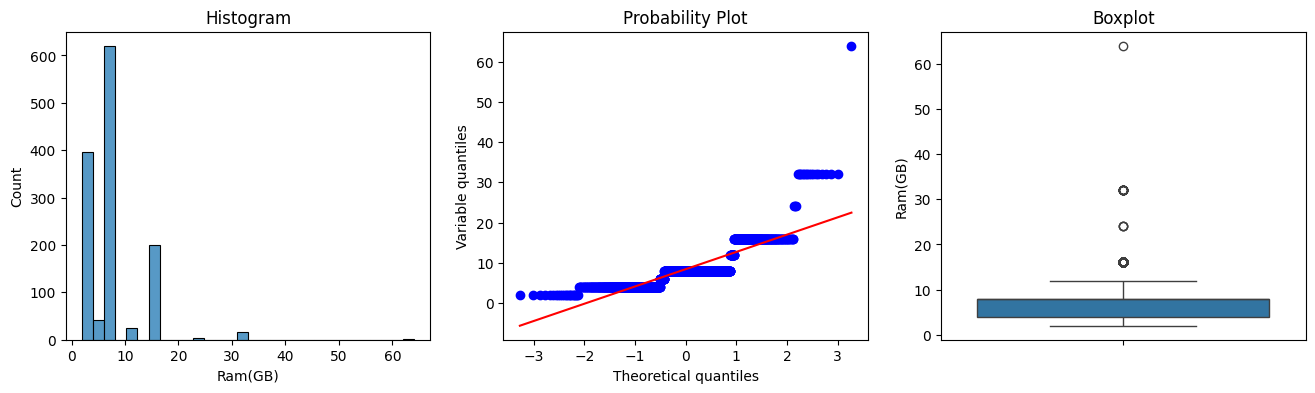

In [ ]:
# let's find outliers

diagnostic_plots(ds, 'Ram(GB)')

In [ ]:
def find_skewed_boundaries(ds, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = ds[variable].quantile(0.75) - ds[variable].quantile(0.25)

    lower_boundary = ds[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = ds[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
Ram_upper_limit, Ram_lower_limit = find_skewed_boundaries(ds, 'Ram(GB)', 4)
Ram_upper_limit, Ram_lower_limit

(24.0, -12.0)

In [ ]:
outliers_Ram = np.where(ds['Ram(GB)'] > Ram_upper_limit, True,
                       np.where(ds['Ram(GB)'] < Ram_lower_limit, True, False))

In [ ]:
ds = ds.loc[~outliers_Ram, ]

ds.shape

(1285, 338)

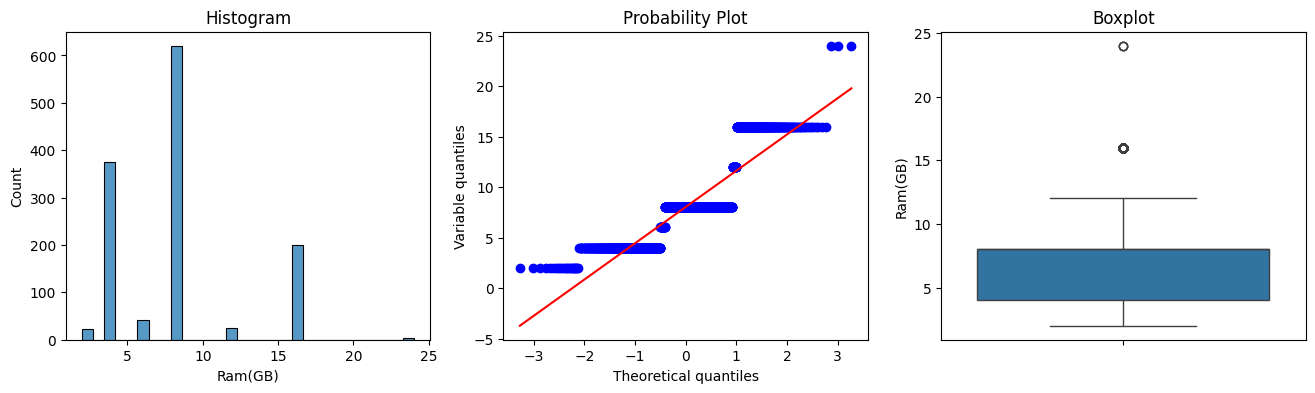

In [ ]:
diagnostic_plots(ds, 'Ram(GB)')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# set up the scaler
cols_to_scale = ['Inches', 'Ram(GB)', 'Weight(kg)']
ds[cols_to_scale].describe()

,Inches,Ram(GB),Weight(kg)
count,1285.000000,1285.000000,1285.000000
mean,14.990117,8.026459,2.014132
std,1.411939,4.036737,0.625924
min,10.100000,2.000000,0.690000
25%,14.000000,4.000000,1.500000
50%,15.600000,8.000000,2.040000
75%,15.600000,8.000000,2.300000
max,17.300000,24.000000,4.600000


In [ ]:
scaler = MinMaxScaler()
ds[cols_to_scale] = scaler.fit_transform(ds[cols_to_scale])
ds[cols_to_scale].describe()

,Inches,Ram(GB),Weight(kg)
count,1285.000000,1285.000000,1285.000000
mean,0.679183,0.273930,0.338653
std,0.196103,0.183488,0.160083
min,0.000000,0.000000,0.000000
25%,0.541667,0.090909,0.207161
50%,0.763889,0.272727,0.345269
75%,0.763889,0.272727,0.411765
max,1.000000,1.000000,1.000000


In [ ]:
ds.head(5)

,Inches,Ram(GB),Weight(kg),Price_euros,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenResolution_1440x900,ScreenResolution_1600x900,ScreenResolution_1920x1080,ScreenResolution_2560x1440,ScreenResolution_4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_4K Ultra HD 3840x2160,ScreenResolution_Full HD / Touchscreen 1920x1080,ScreenResolution_Full HD 1920x1080,ScreenResolution_IPS Panel 1366x768,ScreenResolution_IPS Panel 2560x1440,ScreenResolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_IPS Panel 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Full HD / Touchscreen 1920x1080,ScreenResolution_IPS Panel Full HD 1366x768,ScreenResolution_IPS Panel Full HD 1920x1080,ScreenResolution_IPS Panel Full HD 1920x1200,ScreenResolution_IPS Panel Full HD 2160x1440,ScreenResolution_IPS Panel Full HD 2560x1440,ScreenResolution_IPS Panel Quad HD+ / Touchscreen 3200x1800,ScreenResolution_IPS Panel Quad HD+ 2560x1440,ScreenResolution_IPS Panel Quad HD+ 3200x1800,ScreenResolution_IPS Panel Retina Display 2304x1440,ScreenResolution_IPS Panel Retina Display 2560x1600,ScreenResolution_IPS Panel Retina Display 2736x1824,ScreenResolution_IPS Panel Retina Display 2880x1800,ScreenResolution_IPS Panel Touchscreen / 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Touchscreen 1366x768,ScreenResolution_IPS Panel Touchscreen 1920x1200,ScreenResolution_IPS Panel Touchscreen 2400x1600,ScreenResolution_IPS Panel Touchscreen 2560x1440,ScreenResolution_Quad HD+ / Touchscreen 3200x1800,ScreenResolution_Quad HD+ 3200x1800,ScreenResolution_Touchscreen / 4K Ultra HD 3840x2160,ScreenResolution_Touchscreen / Full HD 1920x1080,ScreenResolution_Touchscreen / Quad HD+ 3200x1800,ScreenResolution_Touchscreen 1366x768,ScreenResolution_Touchscreen 2256x1504,ScreenResolution_Touchscreen 2400x1600,ScreenResolution_Touchscreen 2560x1440,Cpu_AMD A10-Series 9620P 2.5GHz,Cpu_AMD A10-Series A10-9620P 2.5GHz,Cpu_AMD A12-Series 9700P 2.5GHz,Cpu_AMD A12-Series 9720P 2.7GHz,Cpu_AMD A12-Series 9720P 3.6GHz,Cpu_AMD A4-Series 7210 2.2GHz,Cpu_AMD A6-Series 7310 2GHz,Cpu_AMD A6-Series 9220 2.5GHz,Cpu_AMD A6-Series 9220 2.9GHz,Cpu_AMD A6-Series A6-9220 2.5GHz,Cpu_AMD A8-Series 7410 2.2GHz,Cpu_AMD A9-Series 9410 2.9GHz,Cpu_AMD A9-Series 9420 2.9GHz,Cpu_AMD A9-Series 9420 3GHz,Cpu_AMD A9-Series A9-9420 3GHz,Cpu_AMD E-Series 6110 1.5GHz,Cpu_AMD E-Series 7110 1.8GHz,Cpu_AMD E-Series 9000 2.2GHz,Cpu_AMD E-Series 9000e 1.5GHz,Cpu_AMD E-Series E2-6110 1.5GHz,Cpu_AMD E-Series E2-9000 2.2GHz,Cpu_AMD E-Series E2-9000e 1.5GHz,Cpu_AMD FX 8800P 2.1GHz,Cpu_AMD FX 9830P 3GHz,Cpu_AMD Ryzen 1600 3.2GHz,Cpu_AMD Ryzen 1700 3GHz,Cpu_Intel Atom X5-Z8350 1.44GHz,Cpu_Intel Atom Z8350 1.92GHz,Cpu_Intel Atom x5-Z8300 1.44GHz,Cpu_Intel Atom x5-Z8350 1.44GHz,Cpu_Intel Atom x5-Z8550 1.44GHz,Cpu_Intel Celeron Dual Core 3205U 1.5GHz,Cpu_Intel Celeron Dual Core 3855U 1.6GHz,Cpu_Intel Celeron Dual Core N3050 1.6GHz,Cpu_Intel Celeron Dual Core N3060 1.60GHz,Cpu_Intel Celeron Dual Core N3060 1.6GHz,Cpu_Intel Celeron Dual Core N3350 1.1GHz,Cpu_Intel Celeron Dual Core N3350 2.0GHz,Cpu_Intel Celeron Dual Core N3350 2GHz,Cpu_Intel Celeron Quad Core N3160 1.6GHz,Cpu_Intel Celeron Quad Core N3450 1.1GHz,Cpu_Intel Celeron Quad Core N3710 1.6GHz,Cpu_Intel Core M 1.1GHz,Cpu_Intel Core M 1.2GHz,Cpu_Intel Core M 6Y30 0.9GHz,Cpu_Intel Core M 6Y54 1.1GHz,Cpu_Intel Core M 6Y75 1.2GHz,Cpu_Intel Core M 7Y30 1.0GHz,Cpu_Intel Core M M3-6Y30 0.9GHz,Cpu_Intel Core M M7-6Y75 1.2GHz,Cpu_Intel Core M m3 1.2GHz,Cpu_Intel Core M m3-7Y30 2.2GHz,Cpu_Intel Core M m7-6Y75 1.2GHz,Cpu_Intel Core i3 6006U 2.0GHz,Cpu_Intel Core i3 6006U 2.2GHz,Cpu_Intel Core i3 6006U 2GHz,Cpu_Intel Core i3 6100U 2.1GHz,Cpu_Intel Core i3 6100U 2.3GH

In [ ]:
ds.to_csv('/content/drive/MyDrive/SS/laptop_price_modf.csv', index=False)
ds

,Inches,Ram(GB),Weight(kg),Price_euros,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenResolution_1440x900,ScreenResolution_1600x900,ScreenResolution_1920x1080,ScreenResolution_2560x1440,ScreenResolution_4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_4K Ultra HD 3840x2160,ScreenResolution_Full HD / Touchscreen 1920x1080,ScreenResolution_Full HD 1920x1080,ScreenResolution_IPS Panel 1366x768,ScreenResolution_IPS Panel 2560x1440,ScreenResolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_IPS Panel 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Full HD / Touchscreen 1920x1080,ScreenResolution_IPS Panel Full HD 1366x768,ScreenResolution_IPS Panel Full HD 1920x1080,ScreenResolution_IPS Panel Full HD 1920x1200,ScreenResolution_IPS Panel Full HD 2160x1440,ScreenResolution_IPS Panel Full HD 2560x1440,ScreenResolution_IPS Panel Quad HD+ / Touchscreen 3200x1800,ScreenResolution_IPS Panel Quad HD+ 2560x1440,ScreenResolution_IPS Panel Quad HD+ 3200x1800,ScreenResolution_IPS Panel Retina Display 2304x1440,ScreenResolution_IPS Panel Retina Display 2560x1600,ScreenResolution_IPS Panel Retina Display 2736x1824,ScreenResolution_IPS Panel Retina Display 2880x1800,ScreenResolution_IPS Panel Touchscreen / 4K Ultra HD 3840x2160,ScreenResolution_IPS Panel Touchscreen 1366x768,ScreenResolution_IPS Panel Touchscreen 1920x1200,ScreenResolution_IPS Panel Touchscreen 2400x1600,ScreenResolution_IPS Panel Touchscreen 2560x1440,ScreenResolution_Quad HD+ / Touchscreen 3200x1800,ScreenResolution_Quad HD+ 3200x1800,ScreenResolution_Touchscreen / 4K Ultra HD 3840x2160,ScreenResolution_Touchscreen / Full HD 1920x1080,ScreenResolution_Touchscreen / Quad HD+ 3200x1800,ScreenResolution_Touchscreen 1366x768,ScreenResolution_Touchscreen 2256x1504,ScreenResolution_Touchscreen 2400x1600,ScreenResolution_Touchscreen 2560x1440,Cpu_AMD A10-Series 9620P 2.5GHz,Cpu_AMD A10-Series A10-9620P 2.5GHz,Cpu_AMD A12-Series 9700P 2.5GHz,Cpu_AMD A12-Series 9720P 2.7GHz,Cpu_AMD A12-Series 9720P 3.6GHz,Cpu_AMD A4-Series 7210 2.2GHz,Cpu_AMD A6-Series 7310 2GHz,Cpu_AMD A6-Series 9220 2.5GHz,Cpu_AMD A6-Series 9220 2.9GHz,Cpu_AMD A6-Series A6-9220 2.5GHz,Cpu_AMD A8-Series 7410 2.2GHz,Cpu_AMD A9-Series 9410 2.9GHz,Cpu_AMD A9-Series 9420 2.9GHz,Cpu_AMD A9-Series 9420 3GHz,Cpu_AMD A9-Series A9-9420 3GHz,Cpu_AMD E-Series 6110 1.5GHz,Cpu_AMD E-Series 7110 1.8GHz,Cpu_AMD E-Series 9000 2.2GHz,Cpu_AMD E-Series 9000e 1.5GHz,Cpu_AMD E-Series E2-6110 1.5GHz,Cpu_AMD E-Series E2-9000 2.2GHz,Cpu_AMD E-Series E2-9000e 1.5GHz,Cpu_AMD FX 8800P 2.1GHz,Cpu_AMD FX 9830P 3GHz,Cpu_AMD Ryzen 1600 3.2GHz,Cpu_AMD Ryzen 1700 3GHz,Cpu_Intel Atom X5-Z8350 1.44GHz,Cpu_Intel Atom Z8350 1.92GHz,Cpu_Intel Atom x5-Z8300 1.44GHz,Cpu_Intel Atom x5-Z8350 1.44GHz,Cpu_Intel Atom x5-Z8550 1.44GHz,Cpu_Intel Celeron Dual Core 3205U 1.5GHz,Cpu_Intel Celeron Dual Core 3855U 1.6GHz,Cpu_Intel Celeron Dual Core N3050 1.6GHz,Cpu_Intel Celeron Dual Core N3060 1.60GHz,Cpu_Intel Celeron Dual Core N3060 1.6GHz,Cpu_Intel Celeron Dual Core N3350 1.1GHz,Cpu_Intel Celeron Dual Core N3350 2.0GHz,Cpu_Intel Celeron Dual Core N3350 2GHz,Cpu_Intel Celeron Quad Core N3160 1.6GHz,Cpu_Intel Celeron Quad Core N3450 1.1GHz,Cpu_Intel Celeron Quad Core N3710 1.6GHz,Cpu_Intel Core M 1.1GHz,Cpu_Intel Core M 1.2GHz,Cpu_Intel Core M 6Y30 0.9GHz,Cpu_Intel Core M 6Y54 1.1GHz,Cpu_Intel Core M 6Y75 1.2GHz,Cpu_Intel Core M 7Y30 1.0GHz,Cpu_Intel Core M M3-6Y30 0.9GHz,Cpu_Intel Core M M7-6Y75 1.2GHz,Cpu_Intel Core M m3 1.2GHz,Cpu_Intel Core M m3-7Y30 2.2GHz,Cpu_Intel Core M m7-6Y75 1.2GHz,Cpu_Intel Core i3 6006U 2.0GHz,Cpu_Intel Core i3 6006U 2.2GHz,Cpu_Intel Core i3 6006U 2GHz,Cpu_Intel Core i3 6100U 2.1GHz,Cpu_Intel Core i3 6100U 2.3GH